In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from classifier import GeneClassifier
import pandas as pd
from matplotlib import pyplot 
import pandas as pd
import io
import tarfile
import urllib.request



In [2]:
source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz'
tar = tarfile.open(fileobj=urllib.request.urlopen(source), mode="r|gz")
for member in tar:
    filename = member.name
    if 'data' in filename : 
        content = tar.extractfile(member).read()
        data = pd.read_csv(io.BytesIO(content), encoding='utf8')
    elif 'labels' in filename:
        content = tar.extractfile(member).read()
        labels = pd.read_csv(io.BytesIO(content), encoding='utf8')


In [3]:
X = data.drop(data.columns[0],axis=1)
Y = labels.Class
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


In [4]:

from sklearn.decomposition import PCA
from sklearn.svm import SVC
pca = PCA(n_components=5)
lsvc_model = SVC(kernel = 'linear', random_state = 10)
GCLF = GeneClassifier(model=lsvc_model, reduction= pca)
trained = GCLF.fit(X_train,y_train)



print('train score: '+str(GCLF.score(X_train,y_train)))
print('test score:  '+str(GCLF.score(X_test,y_test)))


train score: 1.0
test score:  0.9875776397515528


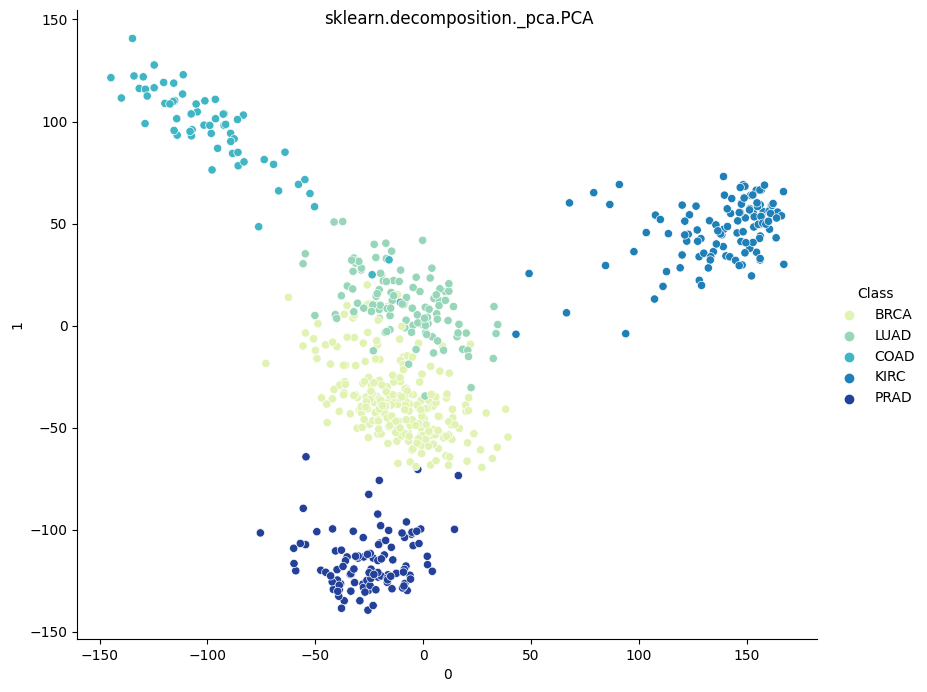

In [5]:
GCLF.plot_reduction_model()
pyplot.show()

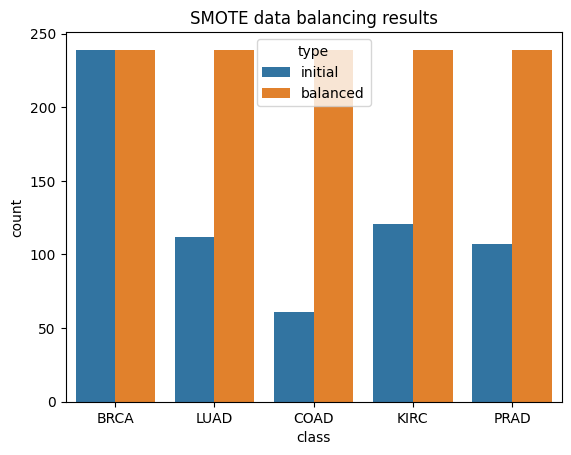

In [6]:
GCLF.plot_balancing()
pyplot.show()

In [7]:
X = data.drop(data.columns[0],axis=1)
Y = labels.Class
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42)

from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=5)
rf_model = RandomForestClassifier()
GCLF = GeneClassifier(model=rf_model, reduction= fa)
trained = GCLF.fit(X_train,y_train)


print('train score: '+str(GCLF.score(X_train,y_train)))
print('test score:  '+str(GCLF.score(X_test,y_test)))

train score: 1.0
test score:  0.9601990049751243


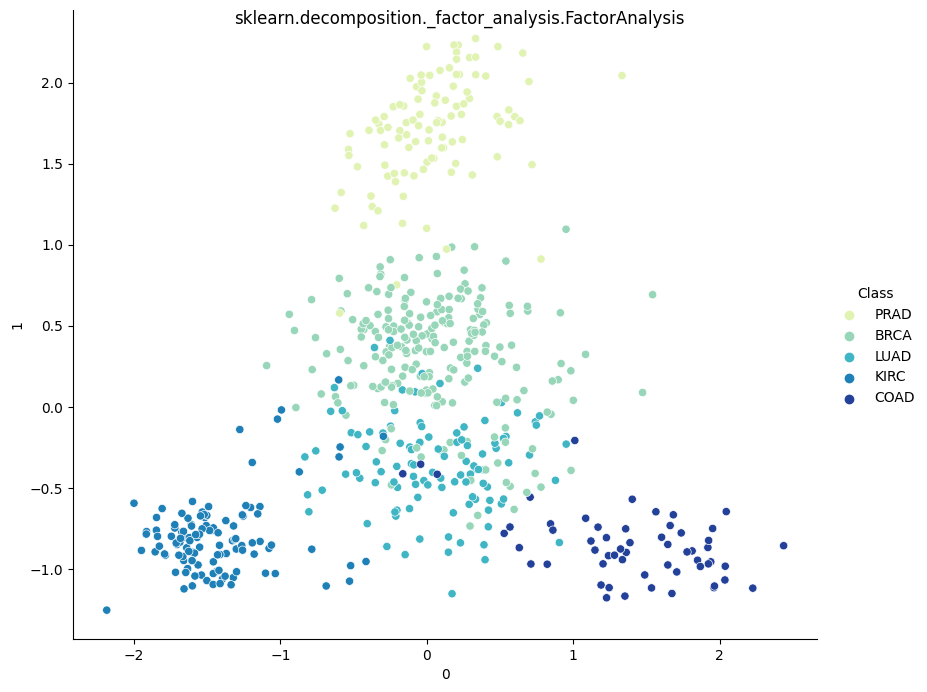

In [8]:
GCLF.plot_reduction_model()
pyplot.show()

In [9]:
parameters = {'model':(RandomForestClassifier(), SVC()), 'reduction':(PCA(n_components=3),PCA(n_components=5), FactorAnalysis(n_components=5))}
gc = GeneClassifier()

clf = GridSearchCV(gc, parameters)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([1.88880553, 1.88226571, 5.743191  , 1.76522956, 1.7472487 ,
        5.20379505]),
 'std_fit_time': array([0.02880697, 0.00545285, 0.76366161, 0.03268739, 0.00983358,
        0.41284308]),
 'mean_score_time': array([0.18147831, 0.1831377 , 0.21233292, 0.19108801, 0.19512382,
        0.18314462]),
 'std_score_time': array([0.0057818 , 0.00580558, 0.0441011 , 0.00517992, 0.00460596,
        0.00313968]),
 'param_model': masked_array(data=[RandomForestClassifier(), RandomForestClassifier(),
                    RandomForestClassifier(), SVC(), SVC(), SVC()],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_reduction': masked_array(data=[PCA(n_components=3), PCA(n_components=5),
                    FactorAnalysis(n_components=5), PCA(n_components=3),
                    PCA(n_components=5), FactorAnalysis(n_components=5)],
              mask=[False, False, False, False, False, False],
        f

In [10]:
clf.best_params_

{'model': SVC(), 'reduction': PCA(n_components=5)}